<a href="https://colab.research.google.com/github/Sofia-dsc/Repo-Procesamiento-del-habla/blob/main/Desafio_Regresi%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alumna**: Sofía Roldán Varela

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



In [2]:
import random
import pandas as pd

# Aplico una semilla random
random.seed(42)

# Defino las categorias
calidad = ['alta', 'baja', 'media']
tamano = ['chico', 'mediano', 'grande']
paises = ['USA', 'Alemania', 'España', 'Francia', 'Rusia', 'China']

# Genero las variables
calidad_var = [random.choice(calidad) for _ in range(1000)]
tamano_var = [random.choice(tamano) for _ in range(1000)]
pais_var = [random.choice(paises) for _ in range(1000)]
peso_var = [random.uniform(2, 10) for _ in range(1000)]  # El peso va a variar entre los 2 y 15 kg

# Genero de la variable objetivo "Precio"
precio_var = []

for calidad, tamano, pais, peso in zip(calidad_var, tamano_var, pais_var, peso_var):
    # Empiezo con un precio base que será 1200
    precio = 1200

    # Ajusto el precio según la calidad
    if calidad == 'alta':
        precio += 700  # Un extra de 700 si la calidad es alta
    elif calidad == 'baja':
        precio -= 200  # Descuento de 200 si la calidad es baja

    # Ajusto el precio según el tamaño
    if tamano == 'chico':
        precio -= 100  # Descuento de 100 para tamaños chicos
    elif tamano == 'grande':
        precio += 400  # Aumento de 400 si es grande

    # Ajusto el precio según el país de importación
    if pais == 'USA':
        precio += 350
    elif pais == 'China':
        precio += 100
    elif pais == 'Alemania':
        precio += 230
    elif pais == 'España':
        precio += 300
    elif pais == 'Francia':
        precio += 350
    elif pais == 'Rusia':
        precio += 270

    # Ajusto por el peso del producto (más pesado, más caro)
    precio += 20 * peso  # Incrementa el precio en función del peso (10 por cada kilo)

    # Añado algo de ruido aleatorio
    precio += random.gauss(0, 5)  # Ruido normal con media 0 y desviación estándar 5

    precio_var.append(precio)

# Creo el DataFrame
df = pd.DataFrame({
    'Calidad': calidad_var,
    'Tamaño': tamano_var,
    'País': pais_var,
    'Peso (kg)': peso_var,
    'Precio': precio_var
})

# Mouestro las primeras filas del dataset generado
print(df.head(10))

  Calidad   Tamaño      País  Peso (kg)       Precio
0   media   grande  Alemania   9.947868  2024.129429
1    alta  mediano  Alemania   3.873292  2209.440088
2    alta   grande  Alemania   9.331176  2719.217487
3   media   grande     China   6.608883  1836.649205
4    baja   grande     Rusia   6.619799  1805.821784
5    alta    chico  Alemania   8.180306  2190.460046
6    alta   grande     China   8.547060  2564.284111
7    alta  mediano   Francia   3.895232  2334.532720
8   media  mediano       USA   9.010067  1731.784011
9    alta  mediano   Francia   9.885564  2441.336402


In [3]:
# Uso info para ver las características de mi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Calidad    1000 non-null   object 
 1   Tamaño     1000 non-null   object 
 2   País       1000 non-null   object 
 3   Peso (kg)  1000 non-null   float64
 4   Precio     1000 non-null   float64
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [7]:
print(f"Cantidad de filas: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")

Cantidad de filas: 1000
Cantidad de columnas: 5


## **Describa como generó los datos.**

### Para crear mi dataset sintético, decidí simular una situación real acerca de la venta de un producto, cuyas variables serían: calidad, tamaño, peso, país de importación (estas variables influirán en el precio) y precio.
### Las variables calidad, tamaño, y país son categóricas.
### Mientras que peso y precio son numericas.
### El dataframe se generó con un tamaño de 1000 filas y 5 columnas


## Preprocesamiento

### Para mi preprocesamiento voy a convertir las variables categóricas (calidad, tamaño, país) a numéricas y escalaré la variable numérica Peso para que el modelo se entrene de manera eficiente.
### Luego voy a dividir los datos en un conjunto de entrenamiento y otro de prueba.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.pipeline import Pipeline

In [21]:
# Creo el preprocesador para transformar las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Calidad', 'Tamaño', 'País']),  # Transformo las variables categóricas
        ('num', StandardScaler(), ['Peso (kg)'])  # Escalo la variable numérica
    ])

In [25]:
# Creo el pipeline para aplicar el preprocesamiento y luego el modelo de regresión
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Crea el modelo de regresión lineal
])

In [26]:
# Divido los datos en entrenamiento y prueba
x = df[['Calidad', 'Tamaño', 'País', 'Peso (kg)']]
y = df['Precio']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Muestro el tamaño de los conjuntos
print(f"Conjunto de entrenamiento: {len(x_train)} ({(len(x_train) / len(x)) * 100:.2f}%)")
print(f"Conjunto de validación: {len(x_test)} ({(len(x_test) / len(x)) * 100:.2f}%)")

Conjunto de entrenamiento: 750 (75.00%)
Conjunto de validación: 250 (25.00%)


## Modelos

## Como primer modelo voy a trabajar con un objeto de la clase "LinearRegression()"

In [28]:
# Entreno el modelo usando el pipeline
pipeline.fit(x_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = pipeline.predict(x_test)

## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

In [29]:
# Evaluo el modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
# Calculo el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Error cuadrático medio (MSE): 27.242329821236176
Mean Absolute Error (MAE): 4.300127974403535


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

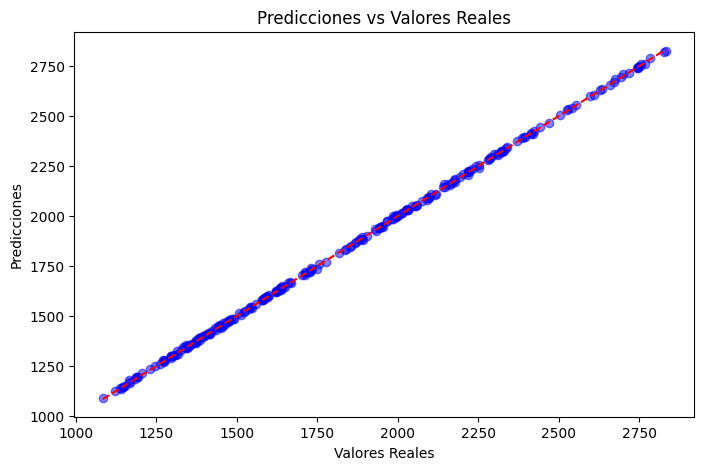

In [32]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

### Este gráfico de dispersión muestra las predicciones del modelo (y_pred) frente a los valores reales (y_test). La línea roja es la línea de referencia, podemos deducir que el modelo realizó bien las predicciones.

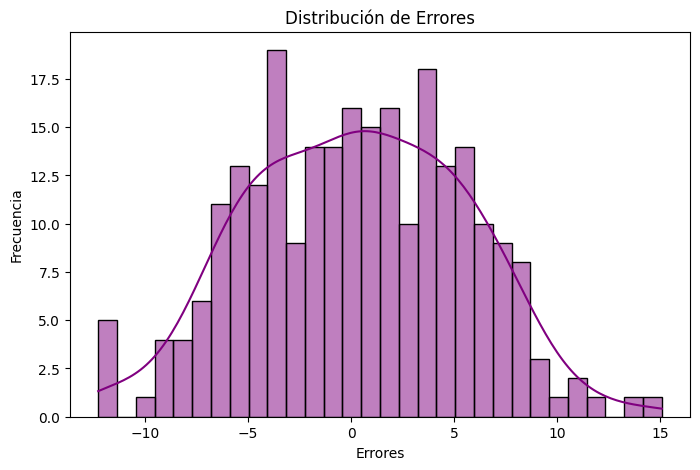

In [51]:
# Histograma de Errores
errors = y_pred - y_test
plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, color='purple', bins=30)
plt.title('Distribución de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

### El histograma muestra la distribución de los errores (las diferencias entre las predicciones y los valores reales).
### Al estar los errores centrados alrededor de 0, se pude decir que tiene una distribución aproximadamente normal.

## **Segundo modelo**

### Para el segundo modelo voy a trabajar Regresión Ridge

In [36]:
# Creo el modelo de regresión Ridge
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # El hiperparámetro alpha controla la regularización L2, que penaliza los coeficientes del modelo
])

In [37]:
# Entreno el modelo con el pipelin preprocesado
ridge_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Calidad', 'Tamaño',
                                                   'País']),
                                                 ('num', StandardScaler(),
                                                  ['Peso (kg)'])])),
                ('regressor', Ridge())])

In [39]:
# Realizo las predicciones y evaluación del modelo
ridge_predictions = ridge_pipeline.predict(x_test)

In [41]:
# Evaluo el modelo con el error cuadrático medio (MSE)
mse_2 = mean_squared_error(y_test, ridge_predictions)
print(f"Error cuadrático medio (MSE): {mse_2}")
# Calculo el Mean Absolute Error (MAE)
mae_2 = mean_absolute_error(y_test, ridge_predictions)
print(f"Mean Absolute Error (MAE): {mae_2}")

Error cuadrático medio (MSE): 32.88883399895837
Mean Absolute Error (MAE): 4.673596360032732


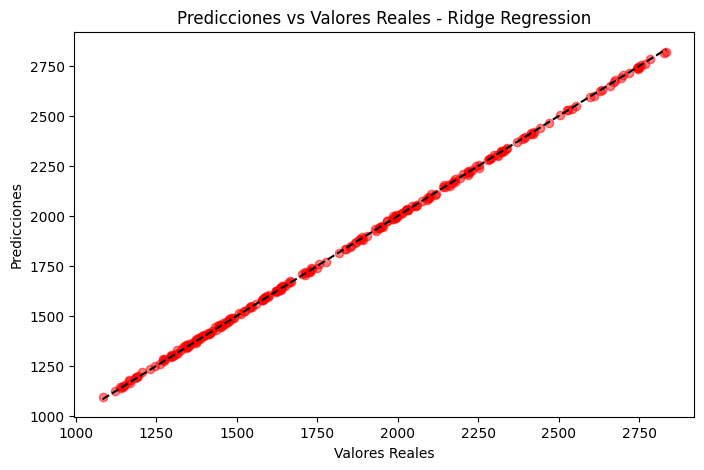

In [46]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, ridge_predictions, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales - Ridge Regression')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

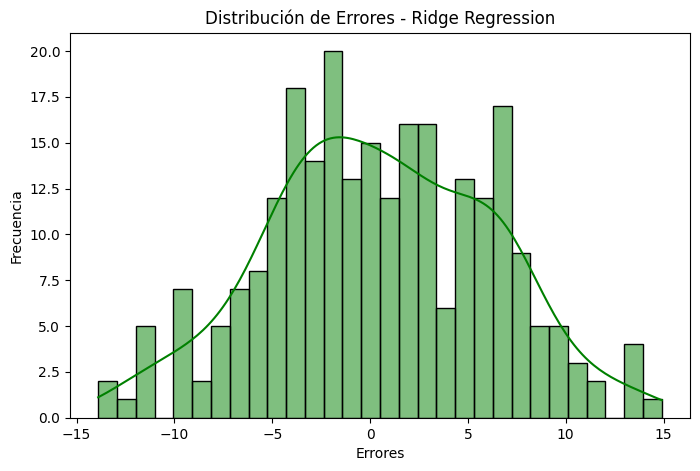

In [50]:
# Histograma de Errores
errors = ridge_predictions - y_test
plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, color='green', bins=30)
plt.title('Distribución de Errores - Ridge Regression')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

# **Conclusión**
### Luego de las evaluaciones se puede decir que ambos modelos están relativamente cerca en cuanto a sus métricas, pero en sí el primer modelo parece ser el mejor, ya que tiene un rendimiento ligeramente mejor en ambas métricas.
### Modelo 1 tiene un **MSE** = 27.24
### Modelo 2 tiene un **MSE** = 32.89
### El Modelo 1 presenta un MSE más bajo, lo que significa que tiene menores errores promedio en términos de magnitud al elevar al cuadrado las diferencias entre las predicciones y los valores reales.
### Modelo 1 tiene un **MAE** = 4.30
### Modelo 2 tiene un **MAE** = 4.67
### El Modelo 1 también tiene un MAE más bajo, lo que indica que en promedio, el Modelo 1 está cometiendo errores más pequeños que el Modelo 2.


## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




## Modifico el modelo 2 Regresión Ridge
### Lo que voy a modificar es el tamaño de los conjuntos de entrenamiento y testeo. Además voy a modificar el hiperparámetro **alpha** que controla la regularización L2, voy a aumentar este valor para que la regularización se vuelve más fuerte, lo que tiende a hacer que los coeficientes de las variables sean más pequeños. Esto reduce el sobreajuste, pero también puede hacer que el modelo subajuste los datos si alpha es demasiado grande.

In [74]:
# Divido los datos en entrenamiento y prueba
x_2 = df[['Calidad', 'Tamaño', 'País', 'Peso (kg)']]
y_2 = df['Precio']
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.15, random_state=42)

# Muestro el tamaño de los conjuntos
print(f"Conjunto de entrenamiento: {len(x_train)} ({(len(x_train) / len(x)) * 100:.2f}%)")
print(f"Conjunto de validación: {len(x_test)} ({(len(x_test) / len(x)) * 100:.2f}%)")

Conjunto de entrenamiento: 850 (85.00%)
Conjunto de validación: 150 (15.00%)


In [75]:
# Creo el modelo de regresión Ridge
ridge_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=6.0))  # Aumento el alpha a 6.0
])

In [76]:
# Entreno el modelo con el pipelin preprocesado
ridge_pipeline_2.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Calidad', 'Tamaño',
                                                   'País']),
                                                 ('num', StandardScaler(),
                                                  ['Peso (kg)'])])),
                ('regressor', Ridge(alpha=6.0))])

In [77]:
# Realizo las predicciones y evaluación del modelo
ridge_predictions_2 = ridge_pipeline_2.predict(x_test)

In [78]:
# Evaluo el modelo con el error cuadrático medio (MSE)
mse_3 = mean_squared_error(y_test, ridge_predictions_2)
print(f"Error cuadrático medio (MSE): {mse_3}")
# Calculo el Mean Absolute Error (MAE)
mae_3 = mean_absolute_error(y_test, ridge_predictions_2)
print(f"Mean Absolute Error (MAE): {mae_3}")

Error cuadrático medio (MSE): 138.83076057008103
Mean Absolute Error (MAE): 9.735251871676653


## **Conclusión de los resultados**
### Cuando el alpha es más alto (último modelo con alpha = 6.0), se aplica másla regularización, lo que reduce la flexibilidad del modelo y puede llevar a subajuste si alpha es demasiado grande. En este caso, el modelo no está capturando adecuadamente la relación entre las variables, lo que resulta en errores mucho más grandes en las predicciones (como muestra el aumento en MSE y MAE). Por ende, este modelo presenta un subajuste a comparación del modelo anterior con otros hiperparámetros, muestra un rendimiento mucho peor, con errores más grandes porque la regularización es demasiado fuerte.

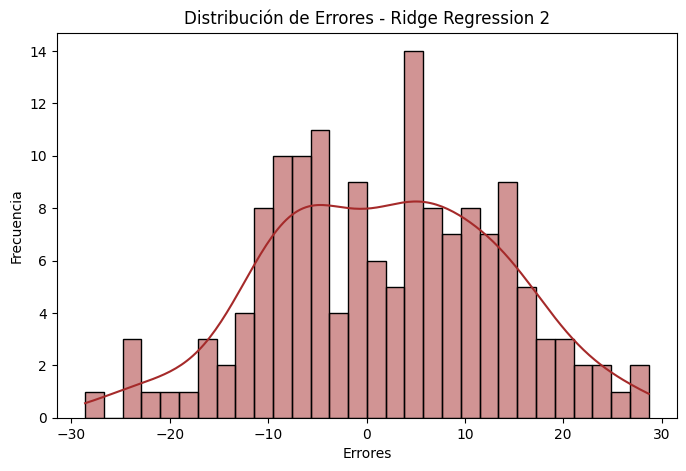

In [81]:
# Gráfico de histograma de Errores para visualizar las diferencias
errors = ridge_predictions_2 - y_test
plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, color='brown', bins=30)
plt.title('Distribución de Errores - Ridge Regression 2')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()


## Grafico la métrica de desempeño vs los valores del hiperarámetro

In [82]:
import numpy as np

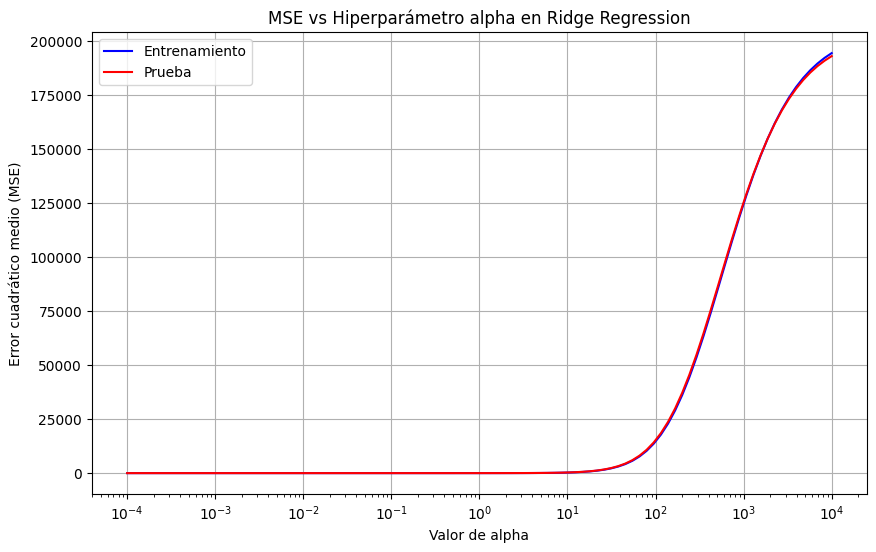

In [85]:
# Lista de valores de alpha
alpha_values = np.logspace(-4, 4, 100)  # Rango de alpha de 10^-4 a 10^4
train_errors = []  # Lista para almacenar los errores en el conjunto de entrenamiento
test_errors = []   # Lista para almacenar los errores en el conjunto de test

# Itero sobre diferentes valores de alpha
for alpha in alpha_values:
    ridge_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=alpha))  # Usar alpha en cada iteración
    ])

    # Entreno el modelo
    ridge_pipeline.fit(x_train, y_train)

    # Realizo las predicciones
    train_pred = ridge_pipeline.predict(x_train)
    test_pred = ridge_pipeline.predict(x_test)

    # Calculo los errores
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    # Almaceno los errores
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Grafico los resultados
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, train_errors, label='Entrenamiento', color='blue')
plt.semilogx(alpha_values, test_errors, label='Prueba', color='red')

# Establezco las etiquetas y título
plt.xlabel('Valor de alpha')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('MSE vs Hiperparámetro alpha en Ridge Regression')
plt.legend()

# Muestro el resultadp del gráfico
plt.grid(True)
plt.show()

### Para el desarrollo de este trabajo me ayudé con algunas documentaciones de scikit-learn
ColumnTransformer - scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

Pipeline - scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Guía de usuario de scikit-learn (User Guide): https://scikit-learn.org/stable/user_guide.html